# Dashboard

> FrankenUI Dashboard Example

In [91]:
#| default_exp dashboard

In [92]:
#| export
from fasthtml.common import *
from fh_frankenui.components import *
from fasthtml.svg import *
from fh_matplotlib import matplotlib2fasthtml
import numpy as np
import matplotlib.pylab as plt

In [93]:
#| hide
from nbdev.showdoc import *

In [94]:
%%html
<script src="https://cdn.tailwindcss.com"></script>
<script src="https://cdn.jsdelivr.net/npm/uikit@3.21.6/dist/js/uikit.min.js"></script>
<script src="https://cdn.jsdelivr.net/npm/uikit@3.21.6/dist/js/uikit-icons.min.js"></script>
<script type="module" src="https://unpkg.com/franken-wc@0.0.6/dist/js/wc.iife.js"></script>
<link rel="stylesheet" href="https://unpkg.com/franken-wc@0.0.6/dist/css/blue.min.css">

<style>
#notebook-container { max-width: none; }
.output_html * { list-style-type: none !important; }
</style>

In [95]:
from httpx import get
url = 'https://raw.githubusercontent.com/AnswerDotAI/fh-frankenui/main/fh_frankenui/components.py?token=###'
fh_frankenui = get(url).text

url = 'https://raw.githubusercontent.com/franken-ui/examples/master/src/pages/dashboard.astro'
dashboard = get(url).text

url = 'https://raw.githubusercontent.com/franken-ui/examples/master/src/pages/cards.astro'
cards = get(url).text

url = 'https://github.com/AnswerDotAI/fh-frankenui-examples/blob/main/fh_frankenui_examples/cards.py'
cards_in_python = get(url).text

url = 'https://github.com/AnswerDotAI/fh-frankenui-examples/blob/main/fh_frankenui_examples/tasks.py'
tasks_in_python = get(url).text

url = 'https://raw.githubusercontent.com/AnswerDotAI/fasthtml/main/examples/adv_app.py'
idiomatic_fasthtml_app = get(url).text


In [96]:
%%ai 0 -c

I am implementing FrankenUI for FastHTML by reimplementing the FrankenUI examples from their docs in a python library.  I am doing this by building a library as I go, `fh_frankenui`.

Reference the `idiomatic_fasthtml_app` to get a feel for fasthtml.

I previously did their `cards` example, and the python implementation looked like `cards_in_python`.

Now, I am looking to do the same with their `dashboard` example.

The goal is to develop the work-in-progress `fh_frankenui` library, so please use `fh_frankenui` as much as makes sense and recommend functions or improvements to `fh_frankenui` when it fits.

Please read all this information and confirm that you understand what I want to do by giving me a brief overview in your own words.  


I understand that you're developing a Python library called `fh_frankenui` to implement FrankenUI components for FastHTML. You've already completed the 'cards' example and are now working on the 'dashboard' example. Your goal is to translate the FrankenUI dashboard example from Astro/HTML to Python using FastHTML and your `fh_frankenui` library.

You want me to help you implement the dashboard example in Python, utilizing and expanding the `fh_frankenui` library as needed. You're looking for suggestions on new functions or improvements to the library that might be useful for this implementation. The process should be similar to how you translated the 'cards' example previously.

You've provided references to an idiomatic FastHTML app, the original FrankenUI dashboard example, and your previous work on the cards example to guide this process.

<task>Okay great.  Let's start by implementing the header section of the dashboard.  This includes the navbar with the dropdown, links, search bar, and user menu.  Please implement this section in Python using FastHTML and fh_frankenui.</task>

In [97]:
%%aip 0

I want a flexible function that can generate the top row of cards that all share the same general format

In [98]:
#| exports
def InfoCard(title, value, change):
    return Card(
             Div(UkH3(value),
                P(change, cls=TextT.muted_sm)),
             header = UkH4(title),)

In [99]:
%%aip 0
Use the `InfoCard` function to create the top row of cards - each one in a variable (rev,sub,sal,act).

In [100]:
#| exports
rev = InfoCard("Total Revenue", "$45,231.89", "+20.1% from last month")
sub = InfoCard("Subscriptions", "+2350", "+180.1% from last month")
sal = InfoCard("Sales", "+12,234", "+19% from last month")
act = InfoCard("Active Now", "+573", "+201 since last hour")

In [101]:
#| exports
top_info_row = Div(cls='grid grid-cols-2 gap-4 lg:grid-cols-4')(rev,sub,sal,act)

In [102]:
show(top_info_row)

In [103]:
%%aip 0

Let's create the card with the avatars next.  Be sure to reference similar examples from `cards_in_python` to make it as simple as possible.

I don't need an exact recreation so if UkH3 or UkH4 is close enough (like I did previously) then that's fine

In [104]:
#| export
def DiceBearAvatar(seed_name, h, w):
    # Number that work can be found here (not all numbers work): https://tailwindcss.com/docs/height
    return Span(cls=f"relative flex h-{h} w-{w} shrink-0 overflow-hidden rounded-full bg-accent")(
            Img(cls="aspect-square h-full w-full", alt="Avatar", src=f"https://api.dicebear.com/8.x/lorelei/svg?seed={seed_name}"))
    
show(DiceBearAvatar('Isaac Flath', 12,12))

In [105]:
#| exports
def AvatarItem(name, email, amount):
    return Div(cls="flex items-center")(
        DiceBearAvatar(name, 9,9),
        Div(cls="ml-4 space-y-1")(
            P(name, cls=TextT.medium_sm),
            P(email, cls=TextT.muted_sm)),
        Div(amount, cls="ml-auto font-medium"))



recent_sales = Card(
    Div(cls="space-y-8")(
        *[AvatarItem(n,e,d) for (n,e,d) in (
            ("Olivia Martin",   "olivia.martin@email.com",   "+$1,999.00"),
            ("Jackson Lee",     "jackson.lee@email.com",     "+$39.00"),
            ("Isabella Nguyen", "isabella.nguyen@email.com", "+$299.00"),
            ("William Kim",     "will@email.com",            "+$99.00"),
            ("Sofia Davis",     "sofia.davis@email.com",     "+$39.00"))]),
    header=Div(
        UkH3("Recent Sales"),
        P("You made 265 sales this month.", cls=TextT.muted_sm)))

In [106]:
show(recent_sales)

In [107]:
#| exports
@matplotlib2fasthtml
def generate_chart(num_points):
    plotdata = [np.random.exponential(1) for _ in range(num_points)]
    plt.plot(range(len(plotdata)), plotdata)

In [108]:
show(generate_chart(10))

In [109]:
%%aip 0
Now let's make the top navigation section with "Overview", "Analytics", "Reports", "Notifications" tables that use their own functions

In [110]:
#| exports
def NavTab(text, active=False):
    return Li(cls="uk-active" if active else " ")(
        A(text, href="#demo", uk_toggle=True))

def UkTab(*items):
    return Ul(cls="uk-tab-alt max-w-96")(
        *[NavTab(item) for i, item in enumerate(items)])

db_nav = UkTab("Overview", "Analytics", "Reports", "Notifications")
show(db_nav)

In [111]:
%%aip 0
Now let's make the top navigation section with "Overview", "Customers", "products", "Settings" tabs that use their own functions, with the name/teams dropdown too

For the dropdown use either `UkDropdownButton` or `UkSelect` - remember it doesn't need to perfectly match - just look pretty decent and be very simple code.

In [112]:
#| exports
def UkNavBar(*items):
    return Ul(cls="uk-navbar-nav gap-x-4 lg:gap-x-6")(
        *[NavTab(item) for i, item in enumerate(items)])

team_dropdown = UkDropdownButton("Alicia Koch", options = ("Alicia Koch","Acme Inc","Monster Inc.","Create a Team"))

In [113]:
top_nav = Div(cls="uk-navbar-left gap-x-4 lg:gap-x-6")(
    team_dropdown,
    UkNavBar("Overview", "Customers", "Products", "Settings"),
    UkInput(placeholder='Search'),)

In [114]:
show(top_nav)

In [115]:
#| exports
hotkeys = (('Profile','⇧⌘P'), ('Billing','⌘B'), ('Settings','⌘S'), ('New Team',''), ('Logout',''))
user = (Div(cls='flex flex-col space-y-1')(P('Alicia Koch'),P('alicia@example.com',cls=TextT.muted_sm)),)
avatar = A(href='#', cls='h-8 w-8 inline-flex rounded-full bg-accent ring-ring')(Img(src='https://api.dicebear.com/8.x/lorelei/svg?seed=Alicia Koch'))
avatar_dropdown = UkDropdownButton(
    avatar,
    user+hotkeys)

show(avatar_dropdown)

In [129]:
#| exports
top_nav = Div(cls="flex items-center justify-between w-full")(
    Div(cls="flex items-center gap-x-4 lg:gap-x-6")(
        team_dropdown,
        UkNavBar("Overview", "Customers", "Products", "Settings")),
    Div(cls="flex items-center gap-x-4")(
        Div(cls="w-64")(UkInput(placeholder='Search')),
        avatar_dropdown))

show(top_nav)

In [123]:
%%aip

Make $`top_nav` be all in 1 row instead of new rows.  `team_dropdown` and `UkNavBar("Overview", "Customers", "Products", "Settings")` should be left aligned so you can see them all.

Then in the same row, `UkInput(placeholder='Search')` and `avatar_dropdown` should be right aligned somehow.


In [ ]:
#| exports
def page():
    return Div(cls="space-y-4")(
        top_nav,
        UkHSplit(),
        UkH2('Dashboard'),
        db_nav, 
        top_info_row,
        Div(cls="grid gap-4 lg:grid-cols-7")(
            Card(generate_chart(10),cls='lg:col-span-4'),
            Card(recent_sales,cls='lg:col-span-3')))

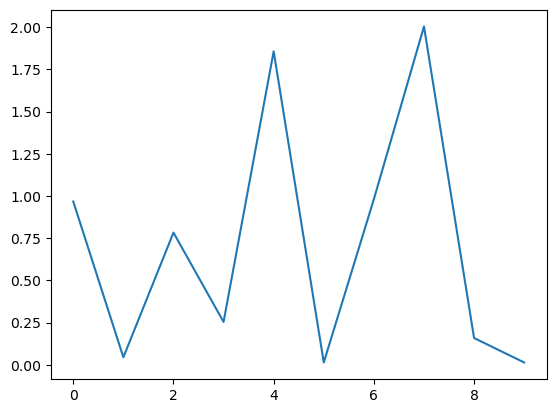

In [ ]:
show(page())

In [81]:
#| exports
dashboard_homepage = page()

NameError: name 'page' is not defined

In [122]:
#| hide
import nbdev; nbdev.nbdev_export()